In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.layers import Input,Dense,LSTM,GRU,BatchNormalization
from tensorflow.keras.layers import PReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [2]:
import tushare as ts
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("CSI.csv", sep=',', engine='python')

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
df

,Time,Open Price,High Price,Low Price,Closing Price,Volume,US Dollar Index,SHIBOR,MACD,CCI,ATR,BOLL,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD
0,20080701,2799.2000,2809.3800,2690.1800,2698.3500,2.885158e+05,72.3400,2.5006,-213.078565,-128.949052,119.2000,3173.475692,3033.748201,2851.25040,-91.5940,2851.32620,-280.7700,-9.424605,-0.097927,-8.726278e+07
1,20080702,2702.6300,2745.9400,2670.0600,2699.6000,2.791637e+05,71.9900,2.7238,-213.732249,-139.719688,75.8750,3140.413385,3001.924277,2822.08280,-152.3180,2797.33820,-252.6450,-8.557733,-0.026497,-1.095493e+08
2,20080703,2654.4800,2807.6800,2617.2600,2760.6100,4.566030e+05,72.7300,2.5762,-206.941406,-112.113057,190.4240,3109.044731,2978.942155,2820.83640,-208.9250,2753.27920,-82.0640,-2.886857,-0.031251,-5.855737e+07
3,20080704,2751.2100,2783.8500,2716.0200,2741.8500,3.790501e+05,72.7100,2.5632,-200.759162,-81.997539,67.8250,3073.107115,2956.362140,2810.05480,-239.0550,2738.44540,-249.4210,-8.338289,-0.017237,-7.467503e+07
4,20080707,2747.6100,2890.9900,2747.6100,2882.7600,5.273202e+05,72.7100,2.5679,-182.386907,21.707767,149.1330,3046.256923,2949.352699,2819.33700,66.7420,2756.63420,109.6870,3.955427,0.010701,-3.531151e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,20160926,3267.6905,3267.6905,3220.2838,3220.2838,7.045219e+09,95.2986,2.1640,-9.961797,-99.426484,55.3827,3304.382381,3282.091578,3265.39465,-18.4461,3262.22222,-122.3421,-3.660060,-0.029463,-2.297142e+08
2006,20160927,3214.8704,3240.7756,3214.4414,3240.7546,5.846055e+09,95.4499,2.1660,-11.814952,-95.785014,26.3342,3299.623515,3278.154723,3257.66571,-22.3696,3258.89246,-100.0626,-2.995153,-0.006697,-9.168405e+07
2007,20160928,3243.6470,3243.6470,3227.9960,3230.8904,4.472750e+09,95.4275,2.1780,-13.919087,-83.431908,15.6510,3294.464696,3273.653359,3254.49432,-26.5130,3251.74328,-108.6736,-3.254125,-0.009031,-1.528095e+08
2008,20160929,3234.8570,3257.7668,3234.8032,3244.3874,5.545256e+09,95.5172,2.1880,-14.332320,-54.442910,26.8764,3290.910562,3270.866125,3252.89976,-22.2489,3242.39654,-73.6566,-2.219880,0.001744,-8.964788e+07


In [4]:
time = df.iloc[:, 0]
time = np.array(time)
df = df.iloc[:, 1:20]
df
#df_numpy = np.array(df.iloc[:, 1:20], dtype=float) #(2010, 19) time * features

,Open Price,High Price,Low Price,Closing Price,Volume,US Dollar Index,SHIBOR,MACD,CCI,ATR,BOLL,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD
0,2799.2000,2809.3800,2690.1800,2698.3500,2.885158e+05,72.3400,2.5006,-213.078565,-128.949052,119.2000,3173.475692,3033.748201,2851.25040,-91.5940,2851.32620,-280.7700,-9.424605,-0.097927,-8.726278e+07
1,2702.6300,2745.9400,2670.0600,2699.6000,2.791637e+05,71.9900,2.7238,-213.732249,-139.719688,75.8750,3140.413385,3001.924277,2822.08280,-152.3180,2797.33820,-252.6450,-8.557733,-0.026497,-1.095493e+08
2,2654.4800,2807.6800,2617.2600,2760.6100,4.566030e+05,72.7300,2.5762,-206.941406,-112.113057,190.4240,3109.044731,2978.942155,2820.83640,-208.9250,2753.27920,-82.0640,-2.886857,-0.031251,-5.855737e+07
3,2751.2100,2783.8500,2716.0200,2741.8500,3.790501e+05,72.7100,2.5632,-200.759162,-81.997539,67.8250,3073.107115,2956.362140,2810.05480,-239.0550,2738.44540,-249.4210,-8.338289,-0.017237,-7.467503e+07
4,2747.6100,2890.9900,2747.6100,2882.7600,5.273202e+05,72.7100,2.5679,-182.386907,21.707767,149.1330,3046.256923,2949.352699,2819.33700,66.7420,2756.63420,109.6870,3.955427,0.010701,-3.531151e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,3267.6905,3267.6905,3220.2838,3220.2838,7.045219e+09,95.2986,2.1640,-9.961797,-99.426484,55.3827,3304.382381,3282.091578,3265.39465,-18.4461,3262.22222,-122.3421,-3.660060,-0.029463,-2.297142e+08
2006,3214.8704,3240.7756,3214.4414,3240.7546,5.846055e+09,95.4499,2.1660,-11.814952,-95.785014,26.3342,3299.623515,3278.154723,3257.66571,-22.3696,3258.89246,-100.0626,-2.995153,-0.006697,-9.168405e+07
2007,3243.6470,3243.6470,3227.9960,3230.8904,4.472750e+09,95.4275,2.1780,-13.919087,-83.431908,15.6510,3294.464696,3273.653359,3254.49432,-26.5130,3251.74328,-108.6736,-3.254125,-0.009031,-1.528095e+08
2008,3234.8570,3257.7668,3234.8032,3244.3874,5.545256e+09,95.5172,2.1880,-14.332320,-54.442910,26.8764,3290.910562,3270.866125,3252.89976,-22.2489,3242.39654,-73.6566,-2.219880,0.001744,-8.964788e+07


In [5]:
df.shape

(2010, 19)

In [6]:
df.describe()

,Open Price,High Price,Low Price,Closing Price,Volume,US Dollar Index,SHIBOR,MACD,CCI,ATR,BOLL,EMA20,MA10,MTM6,MA5,MTM12,ROC,SMI,WVAD
count,2010.000000,2010.000000,2010.000000,2010.000000,2.010000e+03,2010.00000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2.010000e+03
mean,2861.579260,2892.192538,2831.450796,2864.333140,1.465225e+07,83.79357,2.359370,-0.115816,3.997120,63.919718,2862.794414,2863.386725,2863.470976,1.126929,2863.944378,2.216131,0.277960,0.000699,2.258206e+08
std,611.083227,619.423075,598.050996,610.631702,2.771984e+08,7.20708,1.082846,71.340599,108.872150,49.201460,597.842463,595.606669,606.097891,138.903261,608.490467,200.972667,6.375996,0.052284,4.867305e+08
min,1614.620000,1648.450000,1606.730000,1627.760000,1.762430e+05,71.70000,0.800800,-296.249694,-373.867360,9.725000,1786.190885,1772.762398,1668.035400,-1034.945500,1657.231400,-1178.904300,-25.920130,-0.257583,-2.034051e+09
25%,2380.472500,2407.957500,2363.230000,2385.822500,4.880381e+05,79.33000,1.675075,-34.626268,-84.768669,33.527750,2387.049317,2391.797589,2382.641100,-65.439750,2385.976000,-92.103400,-3.306744,-0.028123,-3.504702e+07
50%,2769.625000,2793.310000,2734.060000,2767.935000,7.051809e+05,81.16500,2.197900,0.713980,8.974987,49.320000,2769.346769,2781.513837,2785.583200,6.085000,2768.620200,6.432500,0.266689,0.002355,1.155600e+08
75%,3239.425000,3266.565000,3209.795000,3239.620000,1.074185e+06,87.05000,2.912500,34.034546,95.498257,77.912250,3245.297972,3242.715190,3246.403960,78.334000,3239.251140,111.108250,4.129479,0.032754,3.393197e+08
max,5379.470000,5380.430000,5283.090000,5353.750000,7.045219e+09,100.23510,13.444000,234.688467,291.519715,459.754800,5057.977192,5108.008840,5256.062360,623.778000,5324.405820,715.782000,28.212616,0.180888,2.926073e+09


## Dataset splitting

In [7]:
train_days = 60
out_dim = 1
validation_days = 60
#learning_rate = 0.05 #0.05
test_days = 60
epochs = 100
batchSize = 30
period_days = train_days + validation_days + test_days #62
features = 19
total_period = 6
timestep = 20
diff = 4
period_data = np.zeros((total_period, period_days, features))
df_values = df.values
for i in range(total_period):
    period_data[i] = df[i*test_days: i*test_days+period_days]
##################################################################################################
period1_df = pd.DataFrame(period_data[0], columns=df.columns)
#print(period1_df.shape)
actual_close_price = period1_df.values[train_days + validation_days :, 3]
print(actual_close_price.shape)

(60,)


## Wavelet transform for denoising

In [8]:
import pywt
def wavelet_transform(input_data):
    orig_index = input_data.index
    values = input_data.values
    (ca, cd) = pywt.dwt(values, "haar")
    cat = pywt.threshold(ca, np.std(ca), mode="soft")
    cdt = pywt.threshold(cd, np.std(cd), mode="soft")
    tx = pywt.idwt(cat, cdt, "haar")
    ret = pd.DataFrame(tx, index=orig_index)
    return ret[0]

In [9]:
period_np_wavelet = np.zeros(period1_df.shape)
for i in range(0, features):
    df_col_i = period1_df.iloc[:, i].copy()
    wavelet_col = wavelet_transform(df_col_i)
    #two times wavelet transform
    #wavelet_col = wavelet_transform(wavelet_col).dropna()
    period_np_wavelet[:, i] = wavelet_col.values
#print(period1_np_wavelet.shape)

(520, 19)


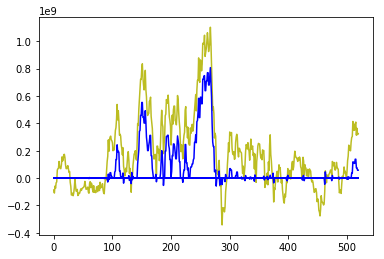

In [10]:
#plot the denosing price with original price

all_data = period_np_wavelet
plt.plot(period1_df.values)
plt.plot(all_data,'b')
print(all_data.shape)

## Perform lb_test

(520,)
[8.39253153e-115 5.05013154e-225 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]
2


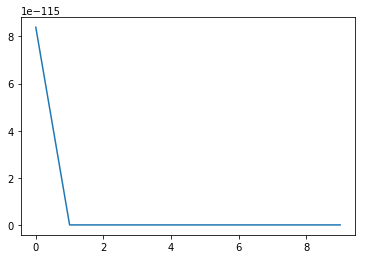

In [11]:
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
lb_list = all_data[:,3]
print(lb_list.shape)
lb = lb_test(lb_list, lags=10, boxpierce=False)[1]
print(lb)
plt.plot(lb)
diff = -1
for i in range(lb.shape[0]):
    if lb[i] == 0:
        diff = i
        break

print(diff)

In [12]:
actual_y_reverse = all_data[:, 3][train_days + validation_days + diff:]
print(actual_y_reverse.shape)

(58,)


## Price difference

In [13]:
#difference output 
#diff = 4
def diff_list(np_list, diff):
    later_add = np_list[validation_days + train_days:len(np_list) - diff, 3] #test set diff
    res = np.zeros((np_list.shape[0] - diff, np_list.shape[1])) #(615, 19)
    for i in range(0, features):
        for j in range(diff, np_list.shape[0]):
            res[j - diff][i] =  np_list[j][i] - np_list[j - diff][i]
    return res, later_add
    

(58,)
(518, 19)
(58,)


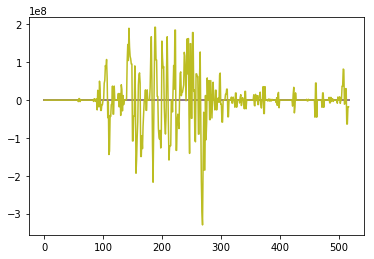

In [14]:
#differential_length = period_days - diff
#print(all_data.shape)    #(620, 19)
differential_res, later_add = diff_list(all_data, diff)
print(later_add.shape)

all_data = differential_res    #(615, 19) 5->620
print(all_data.shape)
#print(all_data)
actual_differential_y = all_data[:, 3][train_days + validation_days:]
print(actual_differential_y.shape)
plt.plot(all_data)

In [15]:
scaler = MinMaxScaler(feature_range=(-1, 1))
all_sae = scaler.fit_transform(all_data)
print(all_sae.shape)

(518, 19)


## Feature Transformation by stacked autoencoder

In [16]:
input_data = Input(shape=(features,))
encoded_1 = Dense(10, activation='relu',activity_regularizer=regularizers.l2(0))(input_data)
encoded_2 = Dense(10, activation='relu',activity_regularizer=regularizers.l2(0))(encoded_1)
encoded_3 = Dense(10, activation='relu',activity_regularizer=regularizers.l2(0))(encoded_2)
encoded_4 = Dense(10, activation='relu',activity_regularizer=regularizers.l2(0))(encoded_3)
decoded_4 = Dense(10, activation='relu',activity_regularizer=regularizers.l2(0))(encoded_4)
decoded_3 = Dense(10, activation='relu',activity_regularizer=regularizers.l2(0))(decoded_4)
decoded_2 = Dense(10, activation='relu',activity_regularizer=regularizers.l2(0))(decoded_3)
decoded_1 = Dense(features, activation='sigmoid')(decoded_2)
#decoded_1 = Dense(features, activation='sigmoid')(encoded_1)
autoencoder = Model(inputs=input_data, outputs=decoded_1)
autoencoder.compile(optimizer='adam', loss='mse')
hist=autoencoder.fit(all_sae,all_sae,epochs=400)

17/17 [==============================] - 0s 873us/step - loss: 0.0448
Epoch 162/400
17/17 [==============================] - 0s 1ms/step - loss: 0.0448
Epoch 163/400
17/17 [==============================] - 0s 935us/step - loss: 0.0448
Epoch 164/400
17/17 [==============================] - 0s 997us/step - loss: 0.0448
Epoch 165/400
17/17 [==============================] - 0s 1ms/step - loss: 0.0448
Epoch 166/400
17/17 [==============================] - 0s 935us/step - loss: 0.0448
Epoch 167/400
17/17 [==============================] - 0s 935us/step - loss: 0.0449
Epoch 168/400
17/17 [==============================] - 0s 810us/step - loss: 0.0447
Epoch 169/400
17/17 [==============================] - 0s 873us/step - loss: 0.0447
Epoch 170/400
17/17 [==============================] - 0s 935us/step - loss: 0.0447
Epoch 171/400
17/17 [==============================] - 0s 935us/step - loss: 0.0448
Epoch 172/400
17/17 [==============================] - 0s 1ms/step - loss: 0.0447
Epoch 173/40

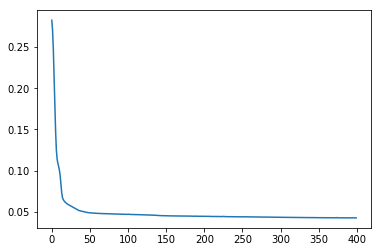

In [17]:

plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])

In [18]:
#denormalize data
encoded_normal_all = autoencoder.predict(all_sae)
encoded_all = scaler.inverse_transform(encoded_normal_all)
print(encoded_all.shape)
print(period_days)

(518, 19)
520


## Standardization

In [19]:
#scaling data
period_days = period_days - diff
test_days = test_days - diff
Xscaler = StandardScaler()
Yscaler = StandardScaler()

orig_X = encoded_all
orig_Y = encoded_all[:, 3].reshape(period_days, 1)
#Y = diff_list(encoded_all[:, 3], diff)
#X = encoded_all[diff:]
#print(X.shape, Y.shape)

lstm_all_x = Xscaler.fit_transform(encoded_all)
lstm_all_y = Yscaler.fit_transform(encoded_all[:, 3].reshape(period_days, 1))
#prepare lstm data
lstm_train_x = lstm_all_x[:train_days + validation_days]
lstm_train_y = lstm_all_y[:train_days + validation_days]
lstm_test_x = lstm_all_x[train_days + validation_days - timestep : ]
lstm_test_y = lstm_all_y[train_days + validation_days - timestep: ]

## Data prepaparation for training
### split the input data and output data of the prediction model

In [20]:
#generate n 
def read_data(np_input, np_output, timestep):
    num_train = np_input.shape[0] - timestep
    num_var = features
    np_input_res = np.zeros((num_train, timestep, num_var))
    np_output_res = np.zeros((num_train, 1))

    for i in range(num_train):
        #begin = i end = i + num_day
        input_tmp = np_input[i : i + timestep] #(day, var)
        np_input_res[i] = input_tmp
        np_output_res[i] = np_output[i + timestep]
    return np_input_res, np_output_res

print(lstm_train_x.shape, lstm_train_y.shape, lstm_test_x.shape, lstm_test_y.shape)
train_lstm_input_tf, train_lstm_output_tf = read_data(lstm_train_x, lstm_train_y, timestep)
test_lstm_input_tf, test_lstm_output_tf = read_data(lstm_test_x, lstm_test_y, timestep)


(460, 19) (460, 1) (78, 19) (78, 1)


## Bulid the LSTM model

In [21]:
from tensorflow.keras import regularizers
model = Sequential()

model.add(LSTM(100, input_shape=(train_lstm_input_tf.shape[1], train_lstm_input_tf.shape[2]), dropout=0.2, recurrent_dropout=0.2,return_sequences=True, activity_regularizer=regularizers.l2(0.003), recurrent_regularizer=regularizers.l2(0)))return_sequences=True, activity_regularizer=regularizers.l2(0.003),
model.add(Dense(100, activation="sigmoid", activity_regularizer=regularizers.l2(0.005)))
model.add(LSTM(50, activation="sigmoid", activity_regularizer=regularizers.l2(0.01),return_sequences=True,recurrent_regularizer=regularizers.l2(0.001),dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation="sigmoid", activity_regularizer=regularizers.l2(0.001)))

model.add(LSTM(100, input_shape=(train_lstm_input_tf.shape[1], train_lstm_input_tf.shape[2]), recurrent_dropout = 0.1))
model.add(Dropout(0.1))
model.add(Dense(1))
    #model.add(Dropout(0.2))
    #model.add(LSTM(50, input_shape=(train_np_input_tf.shape[1], train_np_input_tf.shape[2])))
    #model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
#history=model.fit(train_lstm_input_tf, train_lstm_output_tf, validation_split=0.15, epochs=1600,batch_size=batchSize-8)
# Grid Search
#from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
#kmodel = KerasRegressor(build_fn=build_model)
#from sklearn.model_selection import RandomizedSearchCV
param_grid = [22,25,30,35,40,45]
history = []
#grid_search = RandomizedSearchCV(kmodel, param_grid, n_iter = 6, n_jobs=-1, scoring='neg_log_loss')
for i in param_grid:
    part_history = model.fit(train_lstm_input_tf, train_lstm_output_tf, validation_split=0.15, epochs=1600,batch_size=i)
    history.append(part_history)
#result = grid_search.fit(train_lstm_input_tf, train_lstm_output_tf, validation_split=0.15)

==========] - 0s 8ms/step - loss: 0.0154 - val_loss: 0.6708
Epoch 423/1600
17/17 [==============================] - 0s 9ms/step - loss: 0.0178 - val_loss: 0.6708
Epoch 424/1600
17/17 [==============================] - 0s 10ms/step - loss: 0.0141 - val_loss: 0.7267
Epoch 425/1600
17/17 [==============================] - 0s 10ms/step - loss: 0.0159 - val_loss: 0.7429
Epoch 426/1600
17/17 [==============================] - 0s 10ms/step - loss: 0.0178 - val_loss: 0.6851
Epoch 427/1600
17/17 [==============================] - 0s 9ms/step - loss: 0.0154 - val_loss: 0.6880
Epoch 428/1600
17/17 [==============================] - 0s 11ms/step - loss: 0.0152 - val_loss: 0.6701
Epoch 429/1600
17/17 [==============================] - 0s 12ms/step - loss: 0.0130 - val_loss: 0.6534
Epoch 430/1600
17/17 [==============================] - 0s 12ms/step - loss: 0.0152 - val_loss: 0.6292
Epoch 431/1600
17/17 [==============================] - 0s 10ms/step - loss: 0.0135 - val_loss: 0.6621
Epoch 432/1600


KeyboardInterrupt: 

In [21]:
from keras.wrappers.scikit_learn import KerasRegressor
import keras

def build_model(neuron_num = 100, dropout = 0.1):
    model = Sequential()
    model.add(LSTM(neuron_num, input_shape=(train_lstm_input_tf.shape[1], train_lstm_input_tf.shape[2]), recurrent_dropout = 0.1))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model
sklearn_model = KerasRegressor(build_model)   
#callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)] 
param_grid = {"neuron_num":[60,80,100,120,140], 'dropout':[0.06,0.08,0.1,0.12,0.14]}
from sklearn.model_selection import RandomizedSearchCV
random_search_CV = RandomizedSearchCV(sklearn_model,
                                  param_grid,
                                  n_iter = 10,
                                  n_jobs = -1)
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(train_lstm_input_tf, train_lstm_output_tf, random_state = 7, test_size = 0.25)   
History = random_search_CV.fit(x_train_all, y_train_all, validation_data=(x_test,y_test), epochs=1600,)

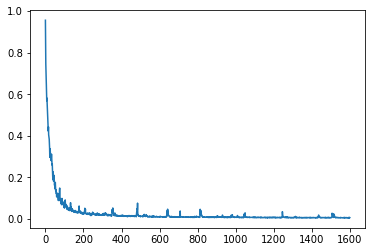

1.2884422540664673


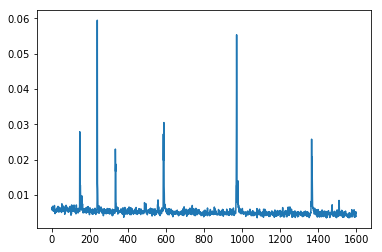

1.548032283782959


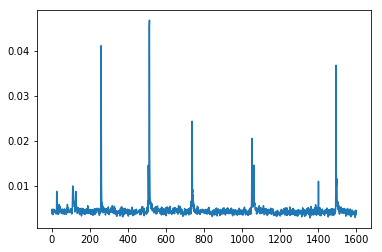

1.807440996170044


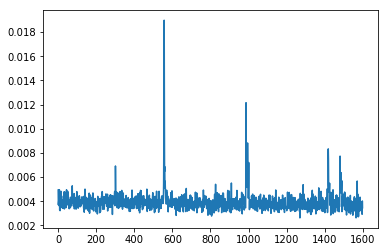

1.9893544912338257


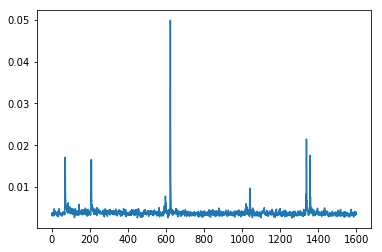

1.6600998640060425


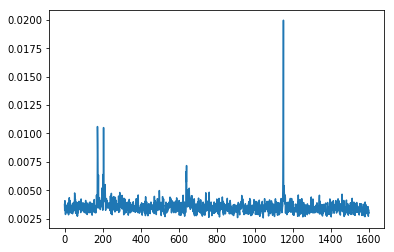

1.8711917400360107


In [46]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
for i in range(len(history)):
    plt.plot(history[i].history['loss'])
    #plt.plot(history[i].history['val_loss'])
    plt.show()
    print(history[i].history['val_loss'][-1])

## Compare the predicted price with actural price

(58,)
(58,)


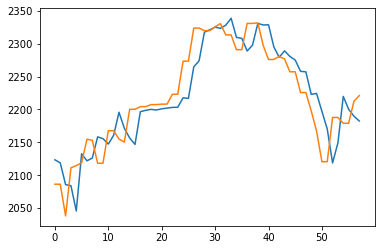

In [1277]:
#print(test_np_input)
#test_input_np_normal
predict = model.predict(test_lstm_input_tf)
#print(test_days)
#print(predict.shape)
ypredict = Yscaler.inverse_transform(predict)[:,0].reshape((test_days))

reverse_differential = []
print(ypredict.shape)
for i in range(len(ypredict)):
    reverse_differential.append(ypredict[i] + later_add[i])
ypredict = np.array(reverse_differential)


print(later_add.shape)

#print(ypredict)
plt.plot(ypredict)
#print(ypredict)
#yactual = period_np_wavelet[:,3][train_days + validation_days:]
yactual = actual_y_reverse
#yactual = actual_differential_y
#print(yactual)
plt.plot(yactual)

In [1278]:
#for un-differential list
price = actual_close_price[diff:]
#rint(price.shape)
match = []
count = 0
for i in range(1, test_days - 1):
    if ypredict[i] >= ypredict[i - 1] and yactual[i] >=yactual[i - 1]:
        count += 1
        match.append("both increase")
    elif ypredict[i] <=ypredict[i - 1] and yactual[i] <=yactual[i - 1]:
        count += 1
        match.append("both decrease")
    elif ypredict[i] >ypredict[i - 1] and yactual[i] < yactual[i - 1]:
        match.append("actual decrease")
    elif ypredict[i] < ypredict[i - 1] and yactual[i] > yactual[i - 1]:
        match.append("actual increase")

print("Accuracy: ", count / price.shape[0])


init = 5000
tmp = init
own = False
arr = ypredict
trade = 0
for i in range(0,arr.shape[0]):
    #print(tmp)
    if arr[i] > arr[i - 1] and own == False:
        #buy
        #print("buy")
        tmp -= price[i - 1]
        own = True
        trade += 1
    if arr[i] < arr[i - 1] and own == True:
        tmp += price[i - 1]
        #print("sell")
        own = False
        trade += 1

if own == True:
    tmp += price[price.shape[0] - 1]
print(tmp, trade)


Accuracy:  0.6379310344827587
4895.100000000002 24


In [1279]:

print(match)
"""
count = 0 
print(yactual.shape, ypredict.shape)
for i in range(yactual.shape[0]):
    if yactual[i] > 0 and ypredict[i] > 0:
        print("Same rise")
        count += 1
    elif yactual[i] < 0 and ypredict[i] < 0:
        print("Same dip")
        count += 1
    elif yactual[i] > 0 and ypredict[i] < 0:
        print("Different rise")
    elif yactual[i] < 0 and ypredict[i] > 0:
        print("Different rise")

print("predict accuracy : ", count / yactual.shape[0])
"""

['both decrease', 'both decrease', 'actual increase', 'actual increase', 'both increase', 'actual increase', 'actual decrease', 'actual decrease', 'both decrease', 'actual increase', 'both increase', 'actual decrease', 'both decrease', 'actual increase', 'both decrease', 'both increase', 'both increase', 'both increase', 'both decrease', 'both increase', 'both increase', 'both increase', 'both increase', 'both increase', 'both decrease', 'both increase', 'both increase', 'actual decrease', 'both increase', 'both increase', 'actual increase', 'actual decrease', 'both increase', 'both decrease', 'both decrease', 'actual increase', 'both increase', 'both increase', 'both decrease', 'actual decrease', 'both decrease', 'actual increase', 'actual decrease', 'both decrease', 'both decrease', 'both decrease', 'both decrease', 'both decrease', 'actual decrease', 'both decrease', 'both decrease', 'actual increase', 'both increase', 'actual decrease', 'both decrease', 'actual increase']


'\ncount = 0 \nprint(yactual.shape, ypredict.shape)\nfor i in range(yactual.shape[0]):\n    if yactual[i] > 0 and ypredict[i] > 0:\n        print("Same rise")\n        count += 1\n    elif yactual[i] < 0 and ypredict[i] < 0:\n        print("Same dip")\n        count += 1\n    elif yactual[i] > 0 and ypredict[i] < 0:\n        print("Different rise")\n    elif yactual[i] < 0 and ypredict[i] > 0:\n        print("Different rise")\n\nprint("predict accuracy : ", count / yactual.shape[0])\n'

In [1281]:
np.corrcoef(ypredict, yactual)[0,1]


0.8933983352200202